# The Basics: Training Your First Model

Celsius to Fahrenheit 변환기를 텐서플로를 사용하여 구현해 보자.  
섭씨를 화씨로 변환하는 공식은 아래와 같다.:

$$ f = c \times 1.8 + 32 $$

TensorFlow에서 Celsius 데이터 (0, 8, 15, 22, 38)를 입력으로 하고 출력이 Fahrenheit values (32, 46, 59, 72, 100)가 되도록 신경망을 훈련하자.  

최종적으로 섭씨를 화씨로 변환하는 모형이 학습된다.

## Import dependencies



In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

## Set up training data

신경망 모형을 학습하기 위해서 훈련 데이터를 생성한다.

In [2]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


## Create the model

텐서플로우의 Dense layer를 사용하여 간단한 모형을 생성한다. 

### Build a layer

`tf.keras.layers.Dense` 의 설정은 다음과 같다.:

*   `input_shape=[1]` — input value가 1개의 값이라는 것이다. one-dimensional array 로 1개의 값을 입력한다. 입력값은 화씨 데이터이다.

*   `units=1` — layer의 neuron 갯수이다. 우리의 예제에서는 1개의 layer만을 사용하므로 output값인 화씨 데이터를 출력하기 위해 1로 설정한다. — 신경망의 최종적인 output은 화씨값이다. 

In [3]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Assemble layers into the model

위에서 지정한 layer로 모형을 생성한다.

In [4]:
model = tf.keras.Sequential([l0])

**Note**

위의 설정은 아래와 같이 간단하게 표현 가능하다.

```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

## Compile the model, with loss and optimizer functions

training에 앞서서, 모형을 compile해야 한다. 이때 다음과 같은 것을 설정해야 한다:

- **Loss function** — 모형의 예측값과 실제값의 차이를 계산한다. 모형의 훈련은 이 loss함수의 값을 최소화하는데 있다.

- **Optimizer function** — loss를 최소화하는 알고리즘을 말한다.


In [5]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

loss function ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) mean_squared_error는 regression 문제를 해결하기 위해 주로 사용된다. optimizer ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) 주로 사용되는 optimizer는 Adam이 있다. 뒤에서 자세히 배우게 된다.

Optimizer 설정시 제일 중요한 요소는 learning rate (`0.1` in the code above)의 설정이다. 학습률이라고 하는데 0.001에서 0.1사이의 값을 기본적으로 사용한다. 

## Train the model

`fit` method로 모형을 훈련한다. 

training을 진행하면서 모형의 "weights"가 optimizer에 의해서 최적화 된다.  

`fit` method가 학습의 기본적인 요소들을 설정한다. 첫 번째 인수는 inputs, 두번째 인수는 outputs. `epochs` 은 얼마나 많은 학습을 진행할건지 횟수를 나타낸다. 그리고 `verbose`인수는 훈련과정을 화면에 표시할지 설정한다.

In [6]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


## Display training statistics

`fit` method는 history object를 리턴한다. 이 object 를 그래프로 표현하여 학습 진행과정을 확인할 수 있다. 훈련 epoch이 진행 되면서 loss가 줄어든 것을 모니터링 할 수 있다. 


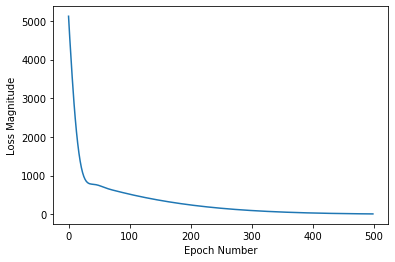

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Use the model to predict values

생성된 모형을 사용하여 예측을 해보자.


In [8]:
print(model.predict([100.0]))

[[211.30165]]


## Looking at the layer weights

최종적으로 생성된 Dense layer의 weights값을 확인해 보자. 

In [9]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8255006]], dtype=float32), array([28.751593], dtype=float32)]


결과값이 변환 공식과 유사하게 훈련된 것을 알 수 있다. 

